# Bond yields and sell your soul to the Devil

## Andres Perez (Worked with group)
(5/5)

## 1.-

This problem uses information from Problem Set 4.  Import the Weekly Economic Index from FRED.  Plot a histogram with 20 bins, and save the output.  Group the data by mean growth rates within each bin.  Estimate the Markov matrix describing the transitions between states.  Use that Markov matrix to estimate the gross yields on one-year and thirty-year bonds for each state.  Use $\beta = 0.97$ and $\gamma = 2$. Don't forget that these are weekly transitions, so the actual discount factor you will use is $\beta^\frac{1}{52}$. Also, bond yields are always quoted in percent per year.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from numpy.linalg import matrix_power  
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (11, 5)  
import quantecon as qe
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from statsmodels.tsa.ar_model import AutoReg
from fredapi import Fred
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_pacf
from numpy.linalg import inv

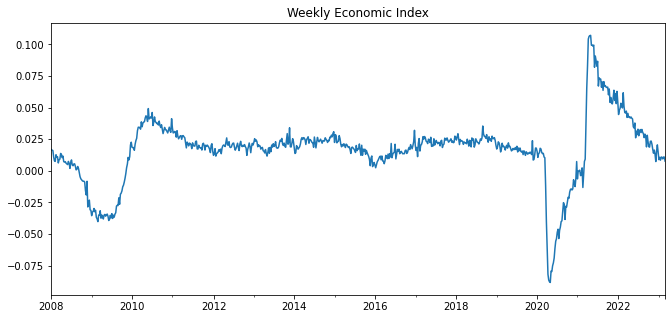

In [2]:
# Acess The FRED Data
fred = Fred(api_key='6c0ecd6565503b64631fd2b36f71293a')

# Create The Weekly Economic Index Series
WEI = fred.get_series('WEI')/100

# Plot And Label The Weekly Economic Index 
WEI.plot(title = "Weekly Economic Index")

# Make The Weekly Economic Index Data Frame
WEI_DF = pd.DataFrame(WEI, columns = ['WEI'])

The edges of the bins are...
[-0.0883  -0.07853 -0.06876 -0.05899 -0.04922 -0.03945 -0.02968 -0.01991
 -0.01014 -0.00037  0.0094   0.01917  0.02894  0.03871  0.04848  0.05825
  0.06802  0.07779  0.08756  0.09733  0.1071 ]

Here are the counts of the number of states in each bin...
[6, 3, 2, 3, 8, 35, 15, 16, 18, 58, 222, 274, 57, 27, 14, 15, 5, 5, 1, 8]

All is well with the count data


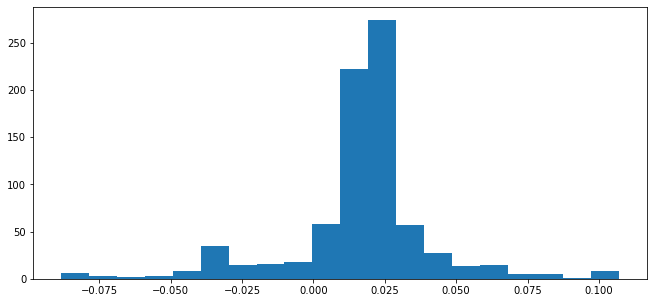

In [3]:
# Creates The Histogram
(counts,bins,patches) = plt.hist(WEI, bins=20)

# Returns The Number Of Bins
print("The edges of the bins are...")
print(bins)
print ("")

# Returns The Count
print ("Here are the counts of the number of states in each bin...")
print([int(x) for x in counts])
print("")

if np.sum(counts) != len(WEI):
    print("We have lost some data")
else: 
    print ("All is well with the count data")

In [4]:
# Number of States
state_numbers = list(range(len(bins)-1)) 

# Name of States 
state_names = ["State_1", "State_2", "State_3", "State_4",
               "State_5", "State_6", "State_7", "State_8", "State_9", "State_10", 
               "State_11","State_12","State_13","State_14","State_15","State_16",
               "State_17","State_18","State_19","State_20"]

# Function That Classifies Each Value Into A State
def classify(x,bins,states):
    """
    x is the data
    bins gives the break points
    states are the names of the states
    """
    n=len(bins) 
    conditions = []
    for i in range(n-1): 
        conditions.append((x <= bins[i+1]) & (x >= bins[i]))
    return(np.select(conditions, states))

WEI_DF.insert(1,"State Numbers", classify(WEI_DF['WEI'],bins,state_numbers))

### Estimate the Markov matrix

In [5]:
# Groups The Data By The Mean Within Each State
GB = WEI_DF.groupby(by =["State Numbers"])[["WEI"]].mean()

# Inserts The Names Of State
GB.insert(1, "State Names", state_names)

GB

,WEI,State Names
State Numbers,,
0,-0.083883,State_1
1,-0.072300,State_2
2,-0.061050,State_3
3,-0.054333,State_4
4,-0.043350,State_5
5,-0.034894,State_6
6,-0.025533,State_7
7,-0.014650,State_8
8,-0.005956,State_9


In [6]:
# Sets Matrix Dimensions
dim =len(bins)-1

def estimate_markov(x,dim):
    n=len(x)
    m = np.zeros((dim,dim))
    for i in range (n-1):
        m[int(x[i]), int(x[i+1])] +=1
    row_sums = sum(m.T)
    m = m/row_sums[:,None]
    return(m)

P = estimate_markov (WEI_DF['State Numbers'],dim)

MarMat = pd.DataFrame(P, columns = state_names)
MarMat.index = state_names

print('The Markov matrix is \n')
MarMat

The Markov matrix is 



,State_1,State_2,State_3,State_4,State_5,State_6,State_7,State_8,State_9,State_10,State_11,State_12,State_13,State_14,State_15,State_16,State_17,State_18,State_19,State_20
State_1,0.833333,0.166667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000
State_2,0.000000,0.666667,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000
State_3,0.500000,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000
State_4,0.000000,0.000000,0.000000,0.333333,0.666667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000
State_5,0.000000,0.000000,0.125000,0.125000,0.500000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000
State_6,0.000000,0.000000,0.000000,0.000000,0.028571,0.885714,0.085714,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000
State_7,0.000000,0.000000,0.000000,0.000000,0.000000,0.133333,0.733333,0.133333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000
State_8,0.000000,0.000000,0.000000,0.000000,0.062500,0.000000,0.000000,0.625000,0.312500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000
State_9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.055556,0.111111,0.555556,0.277778,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000
State_10,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.017544,0.052632,0.666667,0.245614,0.000000,0.017544,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000


In [7]:
c = np.exp(GB['WEI'])
β = 0.97**(1/52)
γ = 2


def kern(c0,c,γ):
    """
    This function returns a vectir of Margima rates of substitution 
    Its shape is 1 x n
    c0 is current consumption, a scalar
    c1is list of future consumptions
    γ is the inter-temporal elasticity of substitution
    """
    if γ == 1:
        return np.true_divide(1,c)/(1/c0)
    else: 
        # return np.power(c1,-γ)/c0**(-γ)
        return np.power(c,-γ)/c0**(-γ)
    
def mkern(c,β,γ):
    """
    This method gets the matrix of Arrow security prices
    K(i,j) is the price of Arrow security j, when one is in state i
    """
    n = len(c) # number of states
    K=np.zeros((n,n)) # start with an array of zeros
    for i in range (n):
        K[i,:] = β*kern(c[i],c,γ)  # each row is an asset pricing kernel for consumption in state i
    return(K)

K = mkern(c,β,γ)

In [8]:
# One-year bonds
R = np.ones(20)
T = 52 # One year
M = MarMat

def pricing_T(M,K,R,T):
    """
    M is a markov matrix
    K is a pricing kernel
    R is a matrix of asset payouts.
    R is an n x m matrix.  
    There are n states and m assets.
    R(:,j) is the description of asset j
    The asset returns are by column.
    R(i,j) is what asset j pays if state i happens.
    This method returns a n x m matrix P
    P(i,j) is the price of asset j in state i
    This method prices assets that pay out in the period T only
    """
    if M.shape != K.shape:
        return('Markov matrix and pricing kernels are not conformable.')
    if M.shape[1] != R.shape[0]:
        return('Asset price matrix is not conformable.')
    M1=np.multiply(M,K) #element-by-elemnt multiplication
    P = np.matmul(np.linalg.matrix_power(M1,T), R)  
    #raise M1 to the T the right multiply by R
    return(P)

In [9]:
GB["one-year yields"]=np.around(1/pricing_T(M,K,R,T),3)
GB

,WEI,State Names,one-year yields
State Numbers,,,
0,-0.083883,State_1,1.151
1,-0.072300,State_2,1.133
2,-0.061050,State_3,1.112
3,-0.054333,State_4,1.113
4,-0.043350,State_5,1.090
5,-0.034894,State_6,1.085
6,-0.025533,State_7,1.079
7,-0.014650,State_8,1.075
8,-0.005956,State_9,1.067


In [10]:
T = 52
years = 30
GB["Thirty-year yields"] = np.around((1/pricing_T(M,K,R,T*years))**(1/years),3)
display(GB)

,WEI,State Names,one-year yields,Thirty-year yields
State Numbers,,,,
0,-0.083883,State_1,1.151,1.038
1,-0.072300,State_2,1.133,1.037
2,-0.061050,State_3,1.112,1.036
3,-0.054333,State_4,1.113,1.036
4,-0.043350,State_5,1.090,1.035
5,-0.034894,State_6,1.085,1.034
6,-0.025533,State_7,1.079,1.034
7,-0.014650,State_8,1.075,1.033
8,-0.005956,State_9,1.067,1.032


## 2.-

 You have this von Neuman-Morgenstern utility function:
 
 $$u(w) = \frac{(1 - e^{w*\gamma})}{\gamma}$$
 
Set $\gamma = \frac{1}{1000}$. Plot the utility function from 0 to 100_000. Show that you will not take a 50-50 gamble that loses $\$100$ or wins $\$110$, when your initial wealth is $\$30,000$. Calculate the certainty equivalent of that gamble. Your initial wealth is still $\$30,000$. The Devil offers you all the wealth in the universe, now and forever, for a 50-50 gamble that may cost you $\$1000$. Show that you will not take that gamble. Show that you will take it if it only costs you $\$500$!

In [11]:
def u(c,r):
    if r == 0:
        return c
    else: 
        return (1-np.exp(-r*c))/r

In [12]:
def ce(u,r):
    if r == 0:
        return u 
    else: 
        return np.log(1-r*u)/(-r)

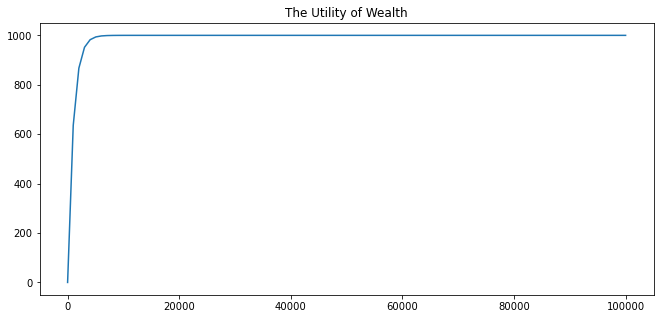

In [13]:
r = 1e-3
xmin,xmax,steps = 0,100_000,100
x = np.linspace(xmin,xmax,steps)
plt.title("The Utility of Wealth")
u_plot = plt.plot(x,u(x,r))

#### Show that you will not take a 50-50 gamble that loses $\$100$ or wins $\$110$, when your initial wealth is $\$30,000$.

In [14]:
def bets(u,r,wealth,x,y): 
    win = u(wealth + y,r)
    lose = u(wealth - x,r)
    if (win + lose)/2 < u(wealth,r):
        return print("I will not take that bet.")
    return "I will take that bet."

In [15]:
bets(u,r,30_000,100,110)

I will not take that bet.


#### Calculate the certainty equivalent of that gamble.

In [16]:
wealth,x,y = 30_000,100,110 
win = u(wealth + y,r)
lose = u(wealth - x,r)
print("The bet is worth", ce((win + lose)/2,r),"dollars to me.")

The bet is worth 29998.648075081146 dollars to me.


In [17]:
print("My current wealth is worth",u(30_000,r),"utils.")

My current wealth is worth 999.9999999999064 utils.


#### Your initial wealth is still $\$30,000$. The Devil offers you all the wealth in the universe, now and forever, for a 50-50 gamble that may cost you $\$1000$. Show that you will not take that gamble. 

In [18]:
cost_gamble = 1000
print(f"A 50-50 shot at all the wealth in the universe or losing {cost_gamble} is worth",(u(29_000,r)+1/r)/2)
if u(wealth,r) > (u(wealth-cost_gamble,r)+1/r)/2:
    print("No deal Devil.")
else:
    print("You have a deal Devil, I'll sell my soul for",cost_gamble,"dollars.")

A 50-50 shot at all the wealth in the universe or losing 1000 is worth 999.9999999998729
No deal Devil.


#### Show that you will take it if it only costs you $\$500$!

In [19]:
cost_gamble = 500
print(f"A 50-50 shot at all the wealth in the universe or losing {cost_gamble} is worth",(u(29_000,r)+1/r)/2)
if u(wealth,r) > (u(wealth-cost_gamble,r)+1/r)/2:
    print("No deal Devil.")
else:
    print("You have a deal Devil, I'll sell my soul for",cost_gamble,"dollars.")

A 50-50 shot at all the wealth in the universe or losing 500 is worth 999.9999999998729
You have a deal Devil, I'll sell my soul for 500 dollars.
